In [1]:
# !pip install anastruct
# if needed

import math
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
# or 'TkAgg'   #COLAB DOESN"T LIKE IT
# or 'Qt5Agg'
from anastruct.fem.system import SystemElements
import matplotlib.pyplot as plt

%matplotlib inline

## COLAB        (calculation=0.8) (plot=0.8) (0.0)
## VSCODE       (calculation=0.8) (plot=0.8) (0.0)
## JUPYTER LAB  (calculation=0.8) (plot=0.8) (interactive=0.0)
## <ipython-input-22-ada69f258b1d>:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown

[DOCUMENTATION](https://anastruct.readthedocs.io/en/latest/)

# Example 1

![](http://www.ritchievink.com/img/fem/example_1/example_1.png)

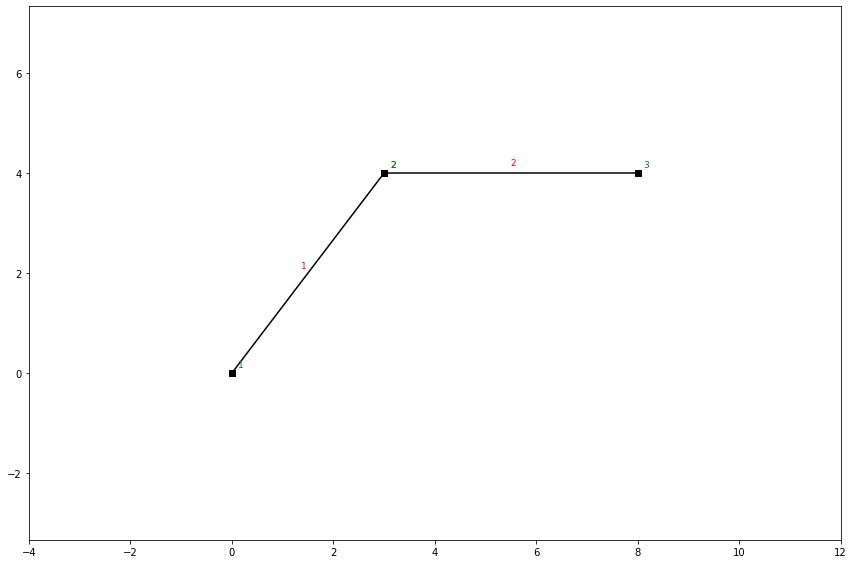

In [2]:
# %matplotlib inline
# from anastruct.fem.system import SystemElements

# Create a new system object.
ss = SystemElements()

# Add beams to the system.
ss.add_element(location=[[0, 0], [3, 4]], EA=5e9, EI=8000)
ss.add_element(location=[[3, 4], [8, 4]], EA=5e9, EI=4000)


# get a visual of the element IDs and the node IDs
#fig = ss.show_structure(show=False)
fig = ss.show_structure()
#fig.show()

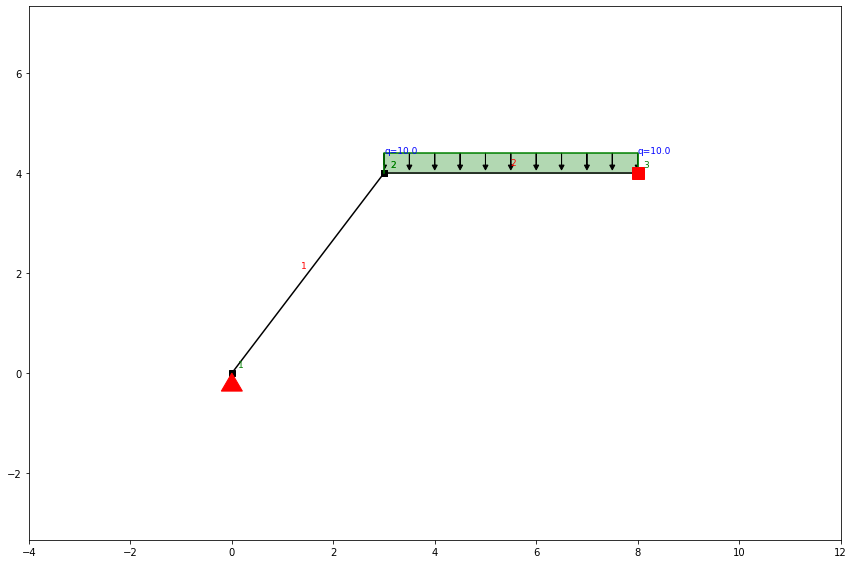

In [3]:
# add loads to the element ID 2
ss.q_load(element_id=2, q=-10)

# add hinged support to node ID 1
ss.add_support_hinged(node_id=1)

# add fixed support to node ID 2
ss.add_support_fixed(node_id=3)

# solve
ss.solve()

# show the structure
#ss.show_structure()
# or...
fig = ss.show_structure(show=False)
#fig.show()

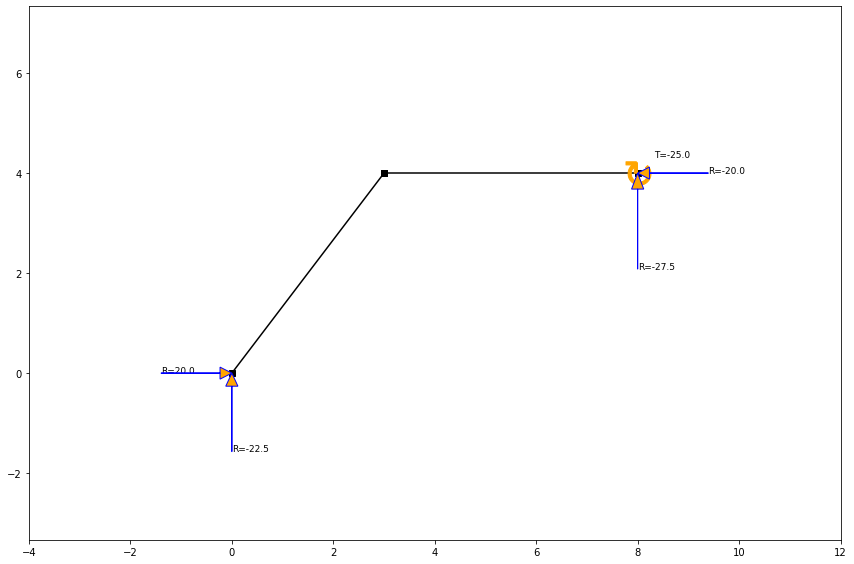

In [4]:
# show the reaction forces
fig = ss.show_reaction_force(show=False)
#fig.show()

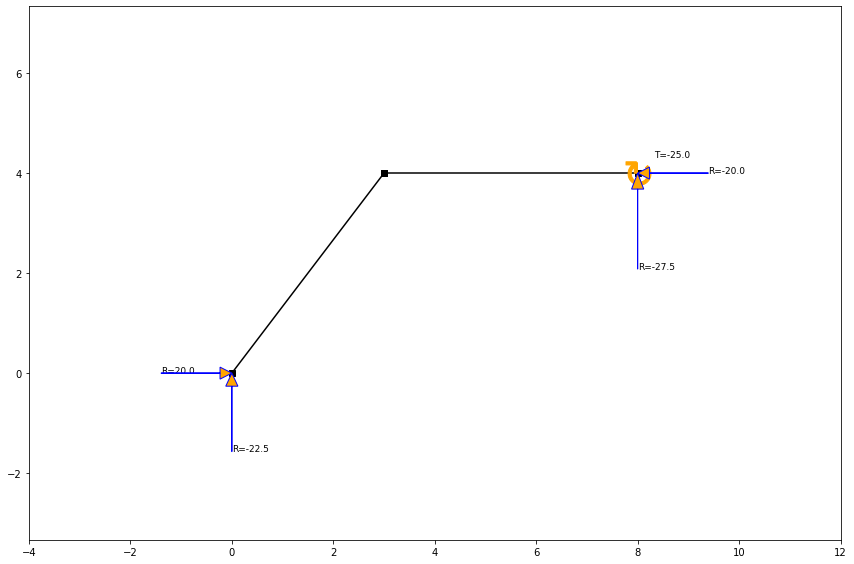

In [5]:
# show the reaction forces
ss.show_reaction_force()

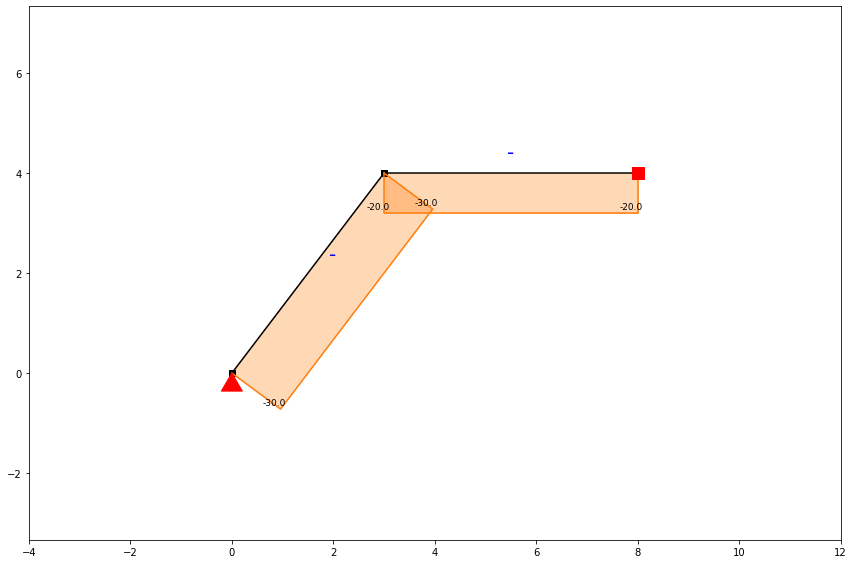

In [6]:
# show the axial forces
ss.show_axial_force()

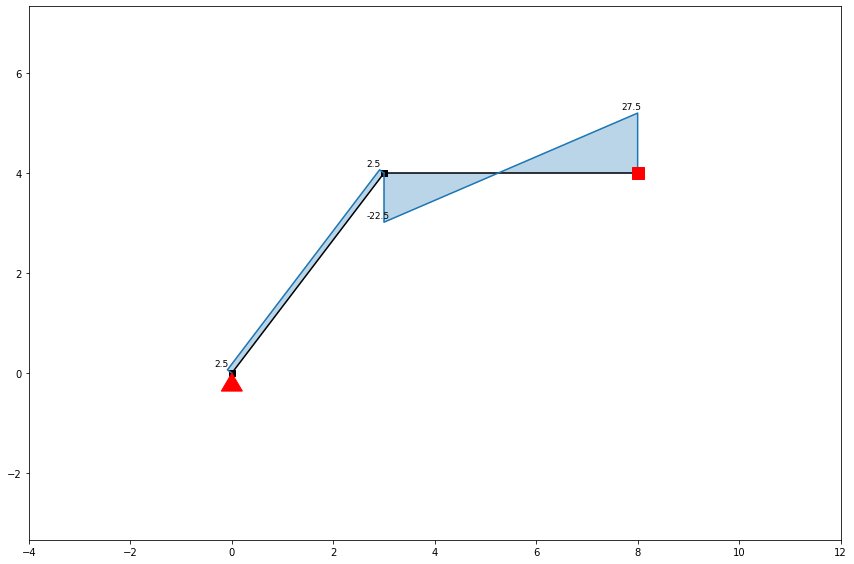

In [7]:
# show the shear force
ss.show_shear_force()

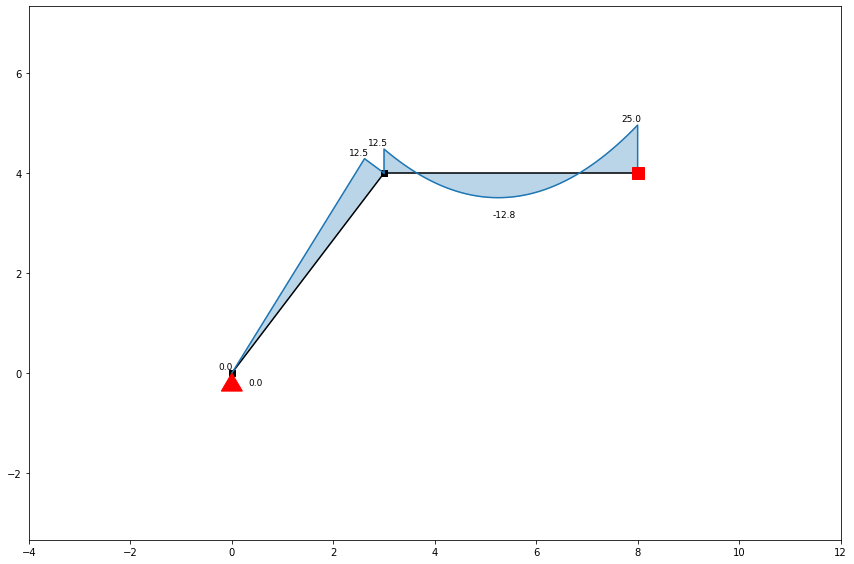

In [8]:
# show the bending moment
ss.show_bending_moment()

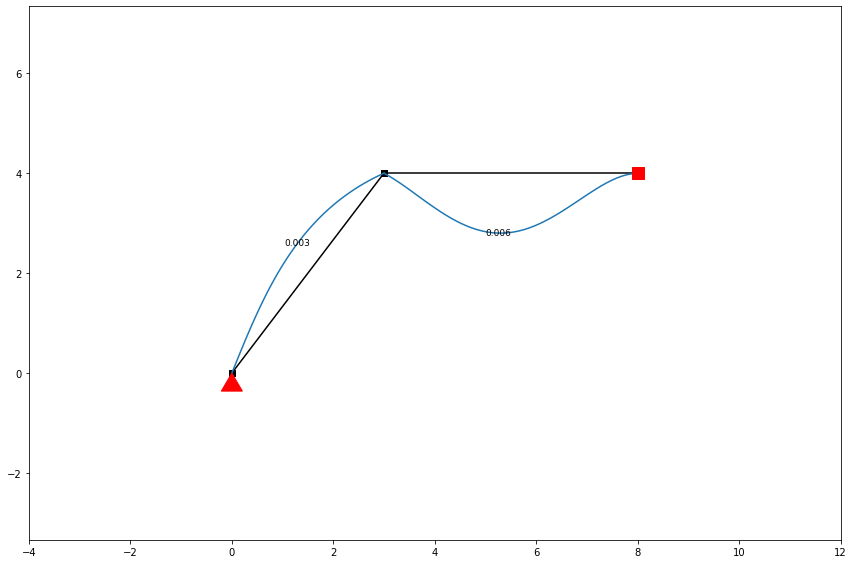

In [9]:
# show the displacements
ss.show_displacement()

# Example 2

![example 2](http://www.ritchievink.com/img/fem/example_2/example_2.png)


In [10]:
ss = SystemElements(EA=5000)
ss.add_truss_element(location=[[0, 0], [0, 5]])
ss.add_truss_element(location=[[0, 5], [5, 5]])
ss.add_truss_element(location=[[5, 5], [5, 0]])
ss.add_truss_element(location=[[0, 0], [5, 5]], EA=5000 * math.sqrt(2))

ss.add_support_hinged(node_id=1)
ss.add_support_hinged(node_id=4)

ss.point_load(Fx=10, node_id=2)

ss.solve()


array([ 0.00000000e+00,  0.00000000e+00, -7.50739186e-03,  4.00000000e-02,
       -7.35662101e-18, -4.95028396e-03,  3.00000000e-02,  1.00000000e-02,
       -2.69147231e-03,  0.00000000e+00,  0.00000000e+00, -7.65426384e-03])

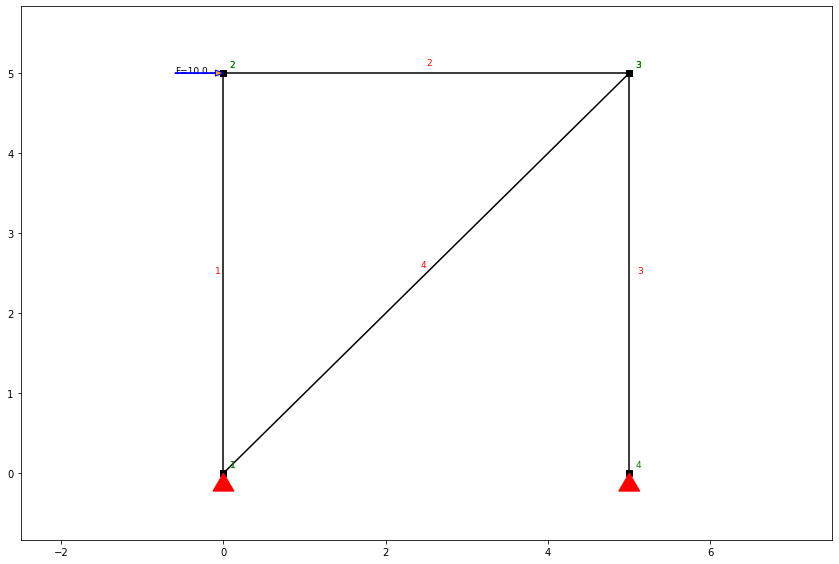

In [11]:
ss.show_structure()

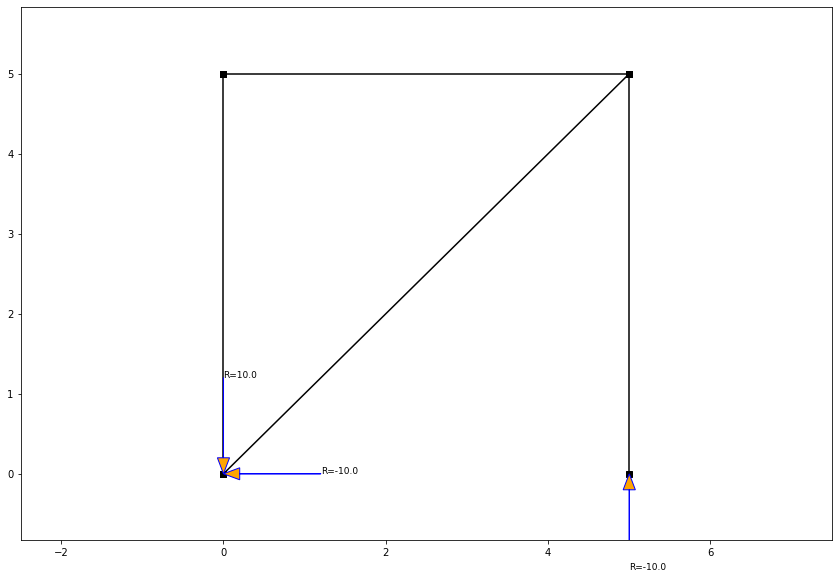

In [12]:
ss.show_reaction_force()

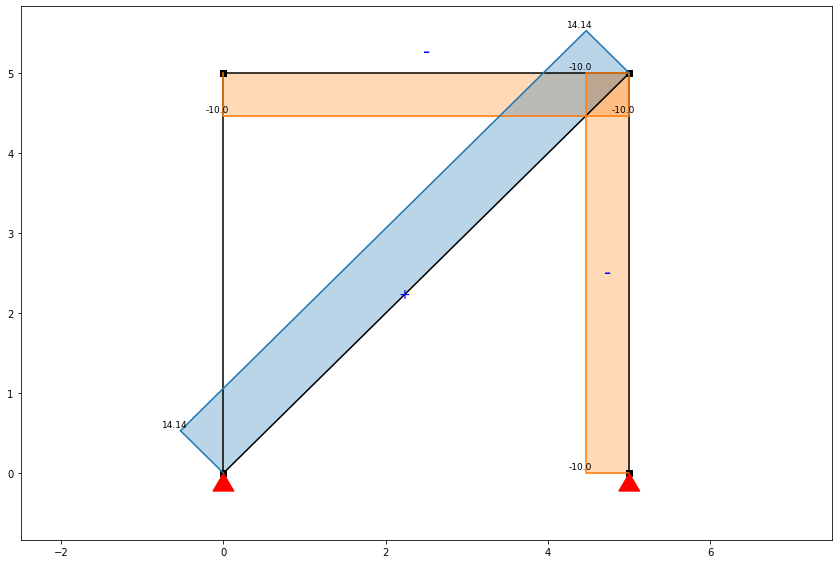

In [13]:
ss.show_axial_force()

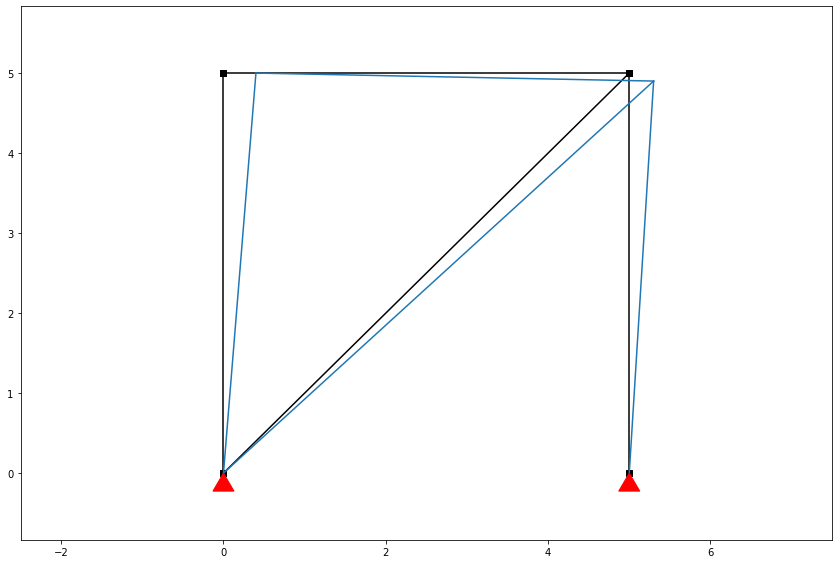

In [14]:
ss.show_displacement(factor=10)

# Example 3

![](http://www.ritchievink.com/img/fem/example_3/example.png)


C bridge as seen in EME035

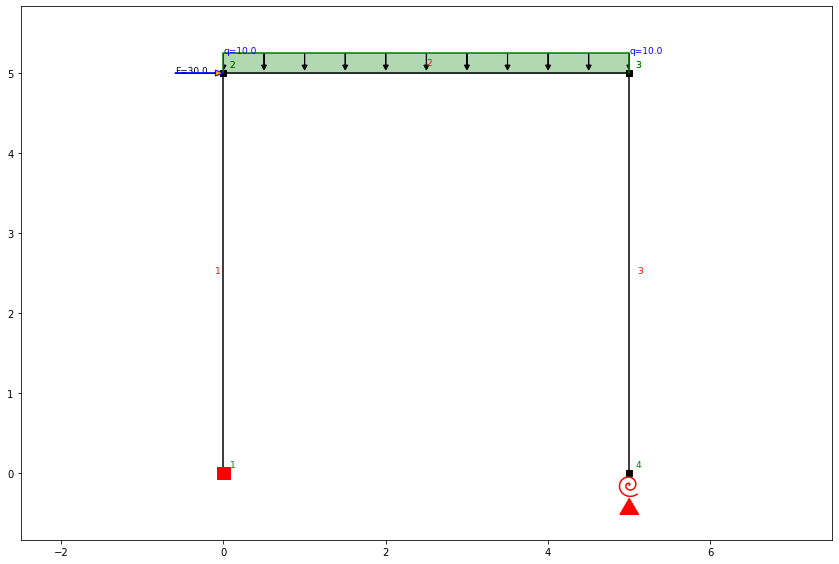

In [15]:
# %matplotlib inline
# from anastruct.fem.system import SystemElements

# Create a new system object.
ss = SystemElements(EA=15000, EI=5000)

# Add beams to the system.
ss.add_element(location=[[0, 0], [0, 5]])
ss.add_element(location=[[0, 5], [5, 5]])
ss.add_element(location=[[5, 5], [5, 0]])

# Add a fixed support at node 1.
ss.add_support_fixed(node_id=1)

# Add a rotational spring at node 4.
ss.add_support_spring(node_id=4, translation=3, k=4000)

# Add loads.
ss.point_load(Fx=30, node_id=2)
ss.q_load(q=-10, element_id=2)

ss.show_structure()


In [16]:

ss.solve()


array([ 0.        ,  0.        ,  0.        ,  0.06264607,  0.00379285,
       -0.01282309,  0.0575402 ,  0.01287382, -0.00216051,  0.        ,
        0.        , -0.0080909 ])

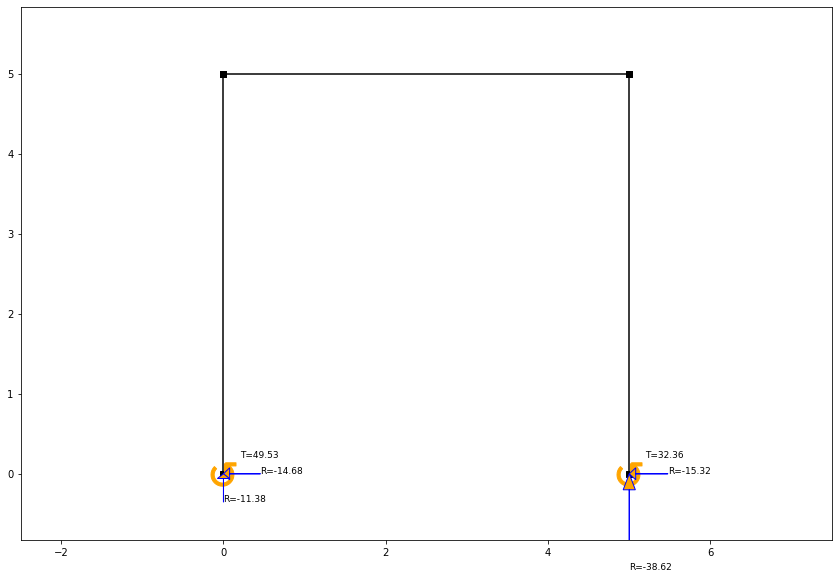

In [17]:
ss.show_reaction_force()

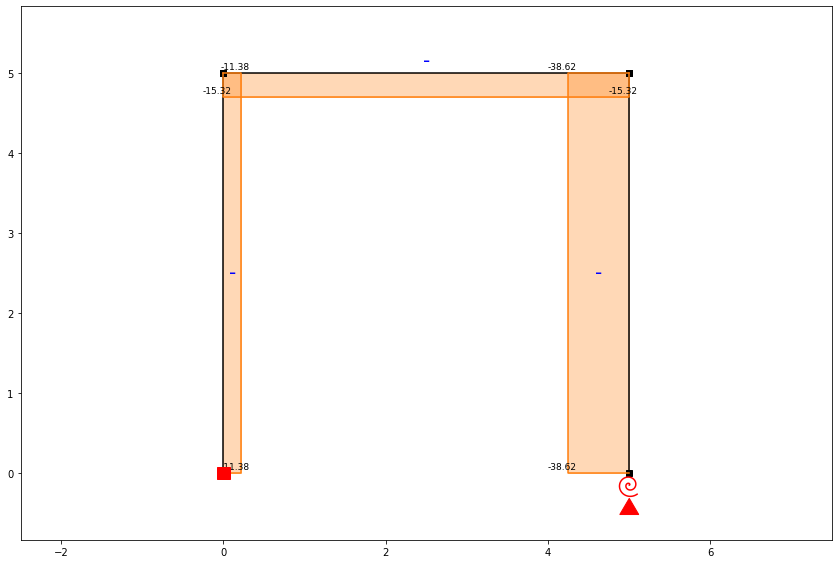

In [18]:
ss.show_axial_force()

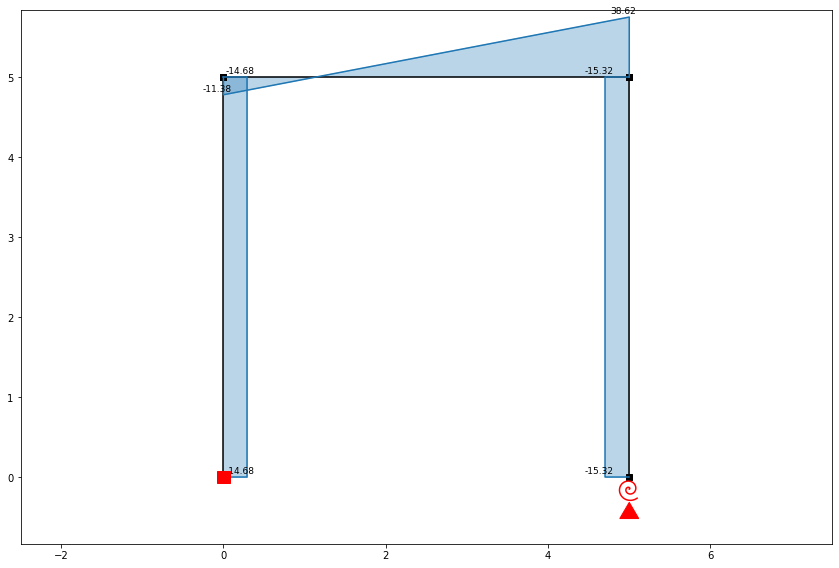

In [19]:
ss.show_shear_force()

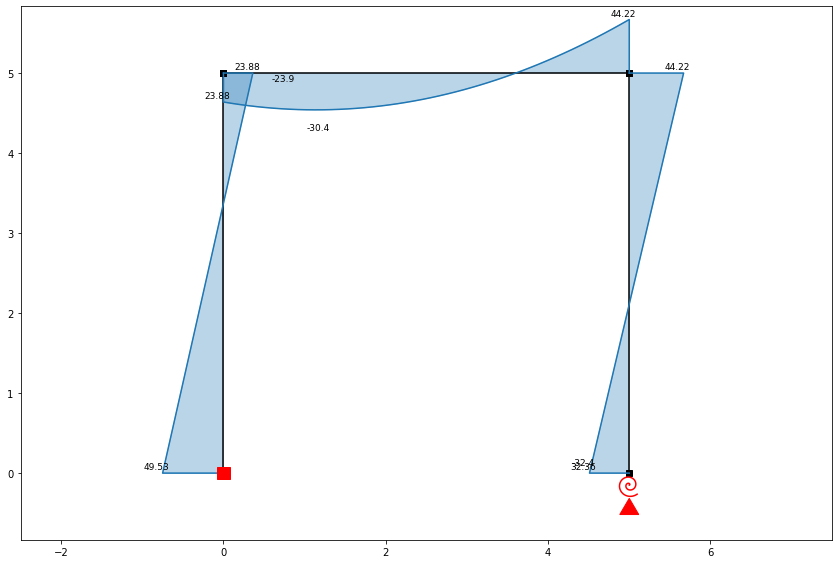

In [20]:
ss.show_bending_moment()

ss.show_displacement()

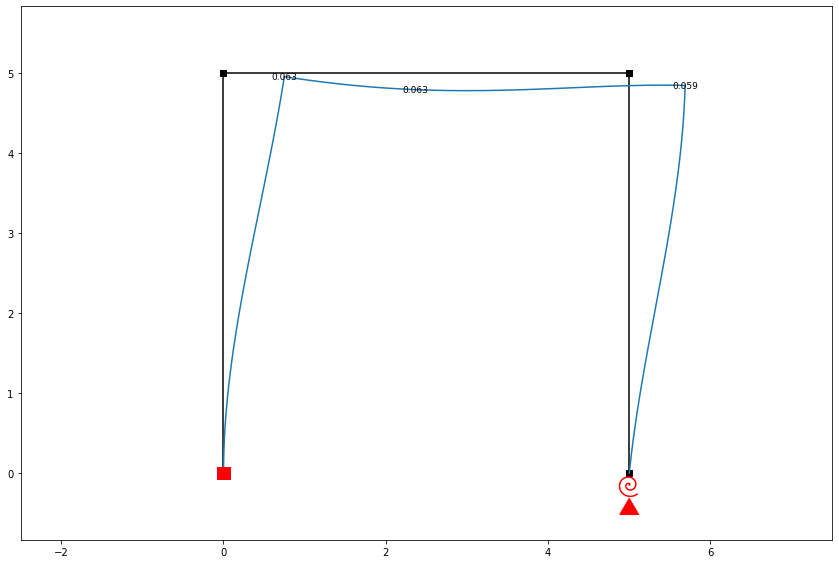

In [21]:
ss.show_displacement()

# Making other shapes

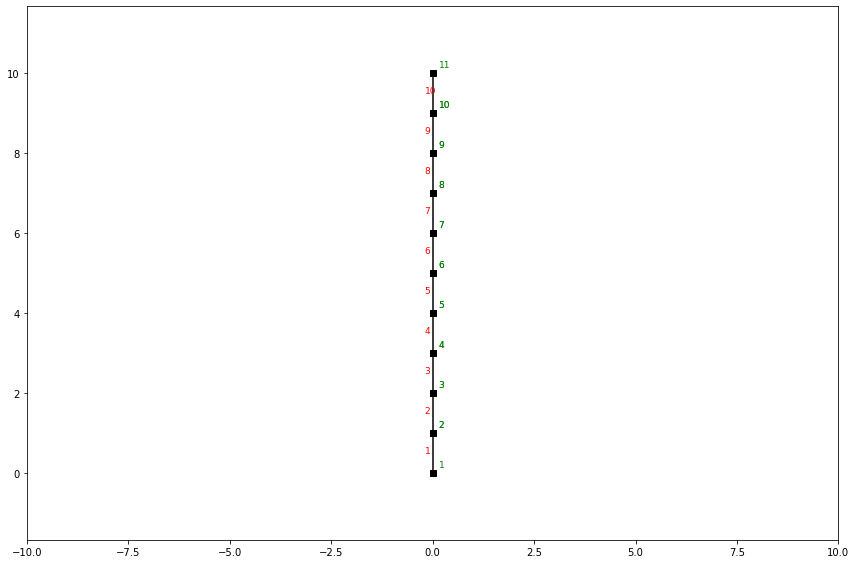

In [22]:
# from anastruct import SystemElements
# import numpy as np

ss = SystemElements(EI=5e3, EA=1e5)
ss.add_multiple_elements([[0, 0], [0, 10]], 10)
ss.show_structure()

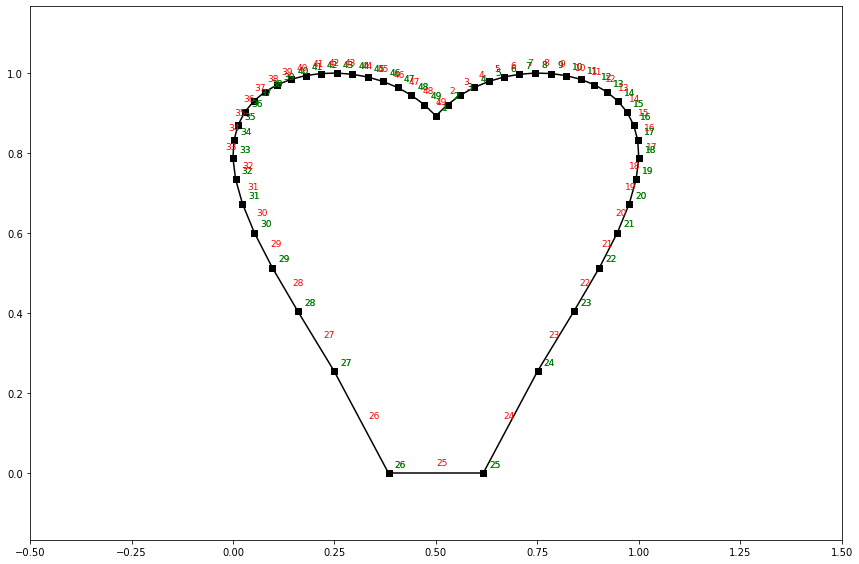

In [23]:
# from anastruct import SystemElements
# import numpy as np

# <3
t = np.linspace(-1, 1)
x = np.sin(t) * np.cos(t) * np.log(np.abs(t))
y = np.abs(t)**0.3 * np.cos(t)**0.5 + 1
# Scaling to positive interval
x = (x - x.min()) / (x - x.min()).max()
y = (y - y.min()) / (y - y.min()).max()

ss = SystemElements()
ss.add_element_grid(x, y)
ss.show_structure()

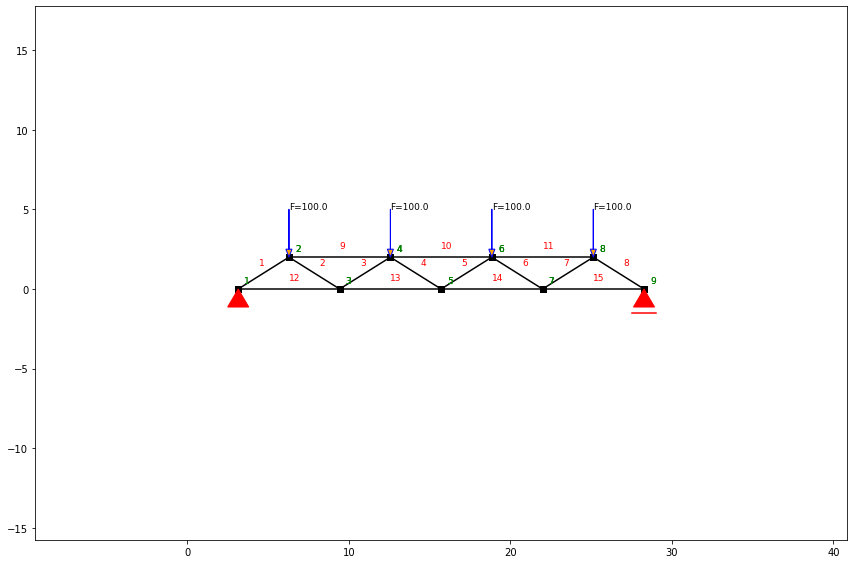

In [24]:
# from anastruct import SystemElements
# import matplotlib.pyplot as plt
# import numpy as np

ss = SystemElements()
element_type = 'truss'

# create triangles
x = np.arange(1, 10) * np.pi
y = np.cos(x)
y -= y.min()
ss.add_element_grid(x, y, element_type=element_type)

# add top girder
ss.add_element_grid(x[1:-1][::2], np.ones(x.shape) * y.max(), element_type=element_type)

# add bottom girder
ss.add_element_grid(x[::2], np.ones(x.shape) * y.min(), element_type=element_type)

# supports
ss.add_support_hinged(1)
ss.add_support_roll(-1, 2)

# loads
ss.point_load(node_id=np.arange(2, 9, 2).tolist(), Fy=-100)

ss.solve()
ss.show_structure()

# Example Truss (intermediate)
I don't understand this one and its not working DEBUG AND LEARN!
-twd 2023-09-15

![](assets/anastruct%20truss.png)

In [25]:
# from anastruct import SystemElements
# import numpy as np

ss = SystemElements()
element_type = 'truss'

# Create 2 towers
width = 6
span = 30
k = 5e3

# create triangles
y = np.arange(1, 10) * np.pi
x = np.cos(y) * width * 0.5
x -= x.min()

for length in [0, span]:
    x_left_column = np.ones(y[::2].shape) * x.min() + length
    x_right_column = np.ones(y[::2].shape[0] + 1) * x.max() + length

    # add triangles
    ss.add_element_grid(x + length, y, element_type=element_type)
    # add vertical elements
    ss.add_element_grid(x_left_column, y[::2], element_type=element_type)
    ss.add_element_grid(x_right_column, np.r_[y[0], y[1::2], y[-1]], element_type=element_type)

    ss.add_support_spring(
        node_id=ss.find_node_id(vertex=[x_left_column[0], y[0]]),
        translation=2,
        k=k)
    ss.add_support_spring(
        node_id=ss.find_node_id(vertex=[x_right_column[0], y[0]]),
        translation=2,
        k=k)

# add top girder
ss.add_element_grid([0, width, span, span + width], np.ones(4) * y.max(), EI=10e3)

# Add stability elements at the bottom.
ss.add_truss_element([[0, y.min()], [width, y.min()]])
ss.add_truss_element([[span, y.min()], [span + width, y.min()]])

for el in ss.element_map.values():
    # apply wind load on elements that are vertical
    if np.isclose(np.sin(el.ai), 1):
        ss.q_load(
            q=1,
            element_id=el.id,
            direction='x'
        )

ss.show_structure()
ss.solve()
ss.show_displacement(factor=2)
ss.show_bending_moment()

AttributeError: 'Element' object has no attribute 'ai'

above was from the front page readme - but the code below is from the documentation

chatgpt explained the error:
>*The error message you’re seeing, “AttributeError: ‘Element’ object has no attribute ‘ai’”, is because the ‘Element’ object in the anastruct library does not have an attribute named ‘ai’.*

>*In your code, you’re trying to access this non-existent attribute in the line:*

>```if np.isclose(np.sin(el.ai), 1):```

>*It seems like you’re trying to apply a wind load on elements that are vertical. However, the ‘Element’ object doesn’t have an attribute that directly gives the angle of inclination.*

>*You might need to calculate the angle of inclination ‘ai’ yourself based on the element’s nodal coordinates. Please check the anastruct documentation or source code to understand how to correctly access or calculate the element’s angle of inclination.*

>*If you’re still having trouble, please provide more details about what you’re trying to achieve with el.ai, and I’ll do my best to help!*

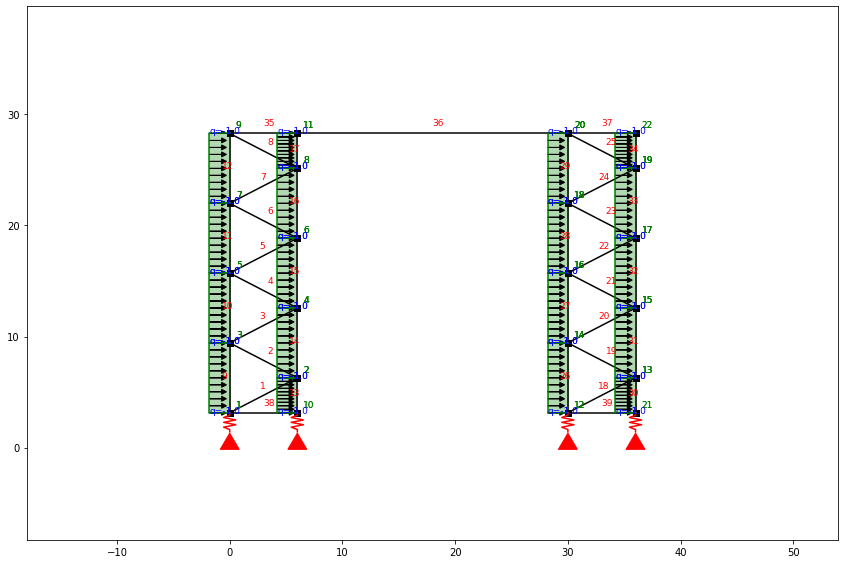

In [26]:
# from anastruct import SystemElements
# import numpy as np

ss = SystemElements()
element_type = 'truss'

# Create 2 towers
width = 6
span = 30
k = 5e3

# create triangles
y = np.arange(1, 10) * np.pi
x = np.cos(y) * width * 0.5
x -= x.min()

for length in [0, span]:
 x_left_column = np.ones(y[::2].shape) * x.min() + length
 x_right_column = np.ones(y[::2].shape[0] + 1) * x.max() + length

 # add triangles
 ss.add_element_grid(x + length, y, element_type=element_type)
 # add vertical elements
 ss.add_element_grid(x_left_column, y[::2], element_type=element_type)
 ss.add_element_grid(x_right_column, np.r_[y[0], y[1::2], y[-1]], element_type=element_type)

 ss.add_support_spring(
 node_id=ss.find_node_id(vertex=[x_left_column[0], y[0]]),
 translation=2,
 k=k)
 ss.add_support_spring(
node_id=ss.find_node_id(vertex=[x_right_column[0], y[0]]),
translation=2,
  k=k)

# add top girder
ss.add_element_grid([0, width, span, span + width], np.ones(4) * y.max(), EI=10e3)

# Add stability elements at the bottom.
ss.add_truss_element([[0, y.min()], [width, y.min()]])
ss.add_truss_element([[span, y.min()], [span + width, y.min()]])

for el in ss.element_map.values():
    # apply wind load on elements that are vertical
    if np.isclose(np.sin(el.angle), 1):
        ss.q_load(
            q=1,
            element_id=el.id,
            direction='x'
        )

ss.show_structure()


In [27]:
ss.solve()

array([ 0.        , -0.01957531, -0.01016826,  0.05664465,  0.03856812,
       -0.01827739,  0.12681493, -0.05058505, -0.02123816,  0.20411133,
        0.05908159, -0.02315166,  0.28537341, -0.06506256, -0.0243787 ,
        0.36654846,  0.06581893, -0.02419497,  0.44591913, -0.06852007,
       -0.0230234 ,  0.52087583,  0.06429239, -0.02470895,  0.59204793,
       -0.0664698 , -0.02582252,  0.        ,  0.01883947, -0.01330637,
        0.5926722 ,  0.06198103, -0.01258037,  0.        , -0.01885581,
       -0.01020619,  0.05708586,  0.04010798, -0.01834168,  0.126906  ,
       -0.0483542 , -0.0212774 ,  0.20467247,  0.06218791, -0.02319328,
        0.2856086 , -0.06131145, -0.02414228,  0.36727325,  0.07048282,
       -0.02423954,  0.44633285, -0.06323981, -0.02501005,  0.52178937,
        0.07050494, -0.02301014,  0.59265597, -0.05965148, -0.01260381,
        0.        ,  0.01959165, -0.01341983,  0.59328429,  0.06896347,
       -0.02585183])

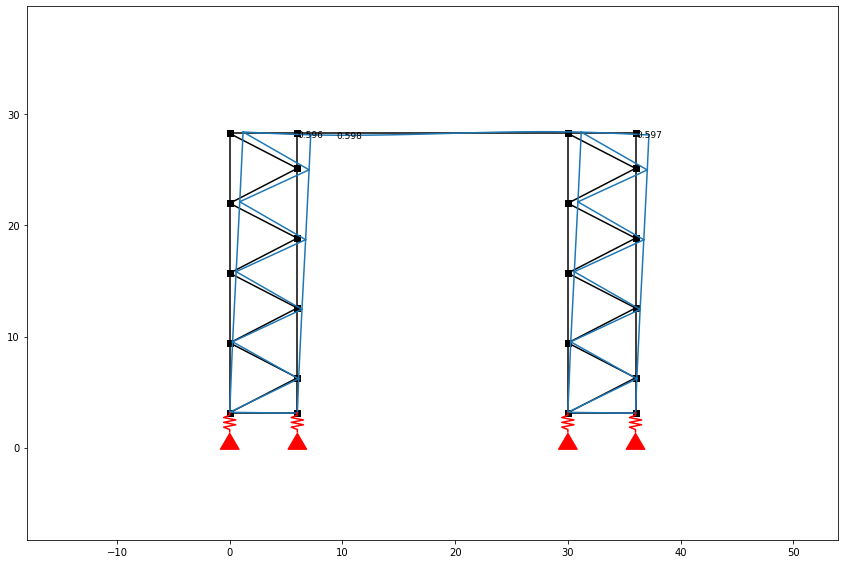

In [28]:
ss.show_displacement(factor=2)

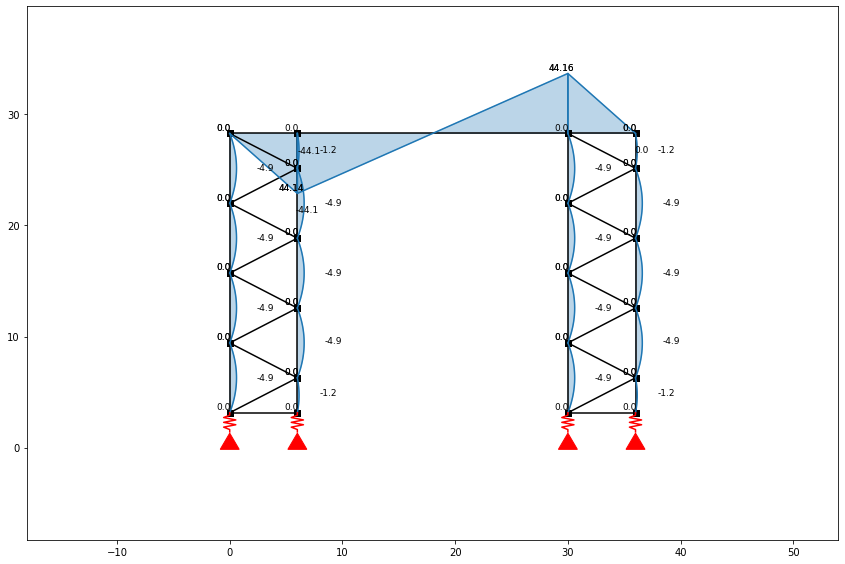

In [29]:
ss.show_bending_moment()

# Example (advanced)
![](assets/ponding-1.png)

![](http://www.ritchievink.com/img/post-10-water/frame.PNG)
[link](http://www.ritchievink.com/blog/2017/08/23/a-nonlinear-water-accumulation-analysis-in-python/)
not working
author provided water_acc.ipynb  which should be the same

In [30]:
# import dependencies
# import matplotlib.pyplot as plt
from anastruct.basic import converge
from anastruct.material.profile import HEA, IPE
from anastruct.fem.system import SystemElements, Vertex
from anastruct.material.units import to_kNm2, to_kN

# constants
E = 2.1e5  # Construction steels Young's modulus
b = 5  # c.t.c distance portals
q_water = 10

# axes height levels
h_1 = 0
h_2 = 0.258
h_3 = 0.046
h_4 = 0.274
h_5 = 0.032
h_6 = 0.15

# beam spans
span_1 = span_2 = 21.9
span_3 = 8.9

# Vertices at the axes
p1 = Vertex(0, h_1)
p2 = Vertex(span_1 * 0.5, h_2)
p3 = Vertex(span_1, h_3)
p4 = Vertex(span_1 + span_2 * 0.5, h_4)
p5 = Vertex(span_1 + span_2, h_5)
p6 = Vertex(span_1 + span_2 + span_3, h_6)

In [31]:
def structure():
    """
    Build the structure from left to right, starting at axis 1.

    variables:
    EA = Young's modulus * Area
    EI = Young's modulus * moment of Inertia
    g = Weight [kN/ m]
    elements = reference of the element id's that were created
    dl = c.t.c distance different nodes.
    """

    dl = 0.2


    ## SPAN 1 AND 2

    # The elements between axis 1 and 3 are an IPE 450 member.
    EA = to_kN(E * IPE[450]['A'])  # Y
    EI = to_kNm2(E * IPE[450]["Iy"])
    g = IPE[450]['G'] / 100

    # New system.
    ss = SystemElements(mesh=3, plot_backend="mpl")

    # span 1
    first = dict(
        spring={1: 9e3},
        mp={1: 70},
    )

    elements = ss.add_multiple_elements(location=[p1, p2], dl=dl, first=first, EA=EA, EI=EI, g=g)
    elements += ss.add_multiple_elements(location=p3, dl=dl, EA=EA, EI=EI, g=g)

    # span 2
    first = dict(
        spring={1: 40e3},
        mp={1: 240}
    )
    elements += ss.add_multiple_elements(location=p4, dl=dl, first=first, EA=EA, EI=EI, g=g)
    elements += ss.add_multiple_elements(location=p5, dl=dl, EA=EA, EI=EI, g=g)


    ## SPAN 3

    # span 3
    # different IPE
    g = IPE[240]['G'] / 100
    EA = to_kN(E * IPE[240]['A'])
    EI = to_kNm2(E * IPE[240]["Iy"])
    first = dict(
        spring={1: 15e3},
        mp={1: 25},
    )

    elements += ss.add_multiple_elements(location=p6, first=first, dl=dl, EA=EA, EI=EI, g=g)

    # Add a dead load of -2 kN/m to all elements.
    ss.q_load(-2, elements, direction="y")


    ## COLUMNS

    # column height
    h = 7.2

    # left column
    EA = to_kN(E * IPE[220]['A'])
    EI = to_kNm2(E * HEA[220]["Iy"])
    left = ss.add_element([[0, 0], [0, -h]], EA=EA, EI=EI)

    # right column
    EA = to_kN(E * IPE[180]['A'])
    EI = to_kNm2(E * HEA[180]["Iy"])
    right = ss.add_element([p6, Vertex(p6.x, -h)], EA=EA, EI=EI)


    ## SUPPORTS

    # node ids for the support
    id_left = max(ss.element_map[left].node_map.keys())
    id_top_right = min(ss.element_map[right].node_map.keys())
    id_btm_right = max(ss.element_map[right].node_map.keys())

    # Add supports. The location of the supports is defined with the nodes id.
    ss.add_support_hinged((id_left, id_btm_right))

    # Retrieve the node ids at axis 2 and 3
    id_p3 = ss.find_node_id(p3)
    id_p5 = ss.find_node_id(p5)

    ss.add_support_roll(id_top_right, direction=1)

    # Add translational spring supports at axes 2 and 3
    ss.add_support_spring(id_p3, translation=2, k=2e3, roll=True)
    ss.add_support_spring(id_p5, translation=2, k=3e3, roll=True)
    return ss

In [32]:
def water_load(ss, water_height, deflection=None):
    """
    :param ss: (SystemElements) object.
    :param water_height: (flt) Water level.
    :param deflection: (array) Computed deflection.
    :return (flt) The cubic meters of water on the structure
    """

    # The horizontal distance between the nodes.
    dl = np.diff(ss.nodes_range('x'))

    if deflection is None:
        deflection = np.zeros(len(ss.node_map))

    # Height of the nodes
    y = np.array(ss.nodes_range('y'))

    # An array with point loads.
    # cubic meters * weight water
    force_water = (water_height - y[:-3] - deflection[:-3]) * q_water * b * dl[:-2]

    cubics = 0
    n = force_water.shape[0]
    for k in ss.node_map:
        if k > n:
            break
        point_load = force_water[k - 1]

        if point_load > 0:
            ss.point_load(k, Fx=0, Fz=-point_load)
            cubics += point_load / q_water

    return cubics

In [33]:
def det_water_height(c, deflection=None):
    """
    :param c: (flt) Cubic meters.
    :param deflection: (array) Node deflection values.
    :return (SystemElement, flt) The structure and the redistributed water level is returned.
    """
    wh = 0.1

    while True:
        ss = structure()
        cubics = water_load(ss, wh, deflection)

        factor = converge(cubics, c)
        if 0.9999 <= factor <= 1.0001:
            return ss, wh

        wh *= factor

In [34]:
cubics = [0]
water_heights = [0]

a = 0
deflection = None
max_water_level = 0

# Iterate from 8 m3 to 15 m3 of water.

for cubic in range(80, 150, 5):  # This loop computes the results per m3 of storaged water.
    wh = 0.05
    lastwh = 0.2
    cubic /= 10

    print(f"Starting analysis of {cubic} m3")

    c = 1
    for _ in range(100):  # This loop redistributes the water until the water level converges.

        # redistribute the water
        ss, wh = det_water_height(wh, deflection)

        # Do a non linear calculation!!
        ss.solve(max_iter=100, verbosity=1)
        deflection = ss.get_node_result_range("uy")

        # Some breaking conditions
        if min(deflection) < -1:
            print(min(deflection), "Breaking due to exceeding max deflection")
            break
        if 0.9999 < lastwh / wh < 1.001:
            print(f"Convergence in {c} iterations.")
            cubics.append(cubic)
            water_heights.append(wh)
            break

        lastwh = wh
        c += 1

    if wh > max_water_level:
        max_water_level = wh
    else:
        a += 1
        if a >= 2:
            print("Breaking. Water level isn't rising.")
            break

Starting analysis of 8.0 m3


TypeError: __init__() got an unexpected keyword argument 'plot_backend'

ValueError: x and y must have same first dimension, but have shapes (20,) and (38,)

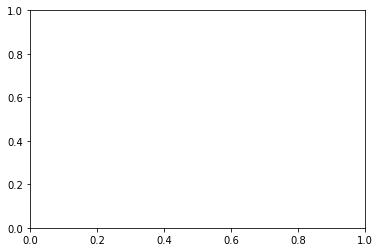

In [35]:
plt.plot(ss.nodes_range('x')[:-2], [el.bending_moment[0] for el in list(ss.element_map.values())[:-1]])
a = 0
plt.plot([0, p6.x], [a, a], color="black")

c = "red"
a = 240
plt.plot([p3.x - 5, p3.x + 5], [a, a], color=c)
a = 25
plt.plot([p5.x - 5, p5.x + 5], [a, a], color=c)
a = 70
plt.plot([p1.x - 5, p1.x + 5], [a, a], color=c)

plt.ylabel("Bending moment [kNm]")
plt.xlabel("Span [m]")
plt.show()

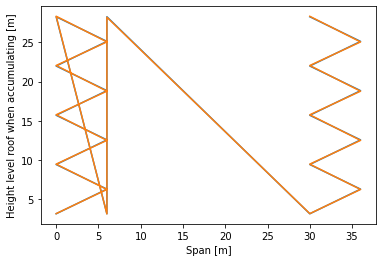

In [36]:
plt.plot(ss.nodes_range('x')[:-2], ss.nodes_range('y')[:-2])
plt.plot(ss.nodes_range('x')[:-2], [a + b for a, b in zip(ss.nodes_range('y')[:-2], ss.get_node_result_range("uy")[:-2])])

plt.ylabel("Height level roof when accumulating [m]")
plt.xlabel("Span [m]")
plt.show()